In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
from torchvision import datasets, transforms , models
from torch.utils.data import DataLoader
import torch
import torch.optim  as optim
from tqdm import tqdm

import numpy as np
from PIL import Image
from skimage import io
from sklearn.model_selection import train_test_split


In [3]:
WIDTH = 224
HEIGHT = 224
NUM_CHANNELS = 3
NUM_CLASSES = 10
TL_NUM_EPOCHS = 15
FT_NUM_EPOCHS = 25
LR = 1e-4
BATCH_SIZE = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
test_images = []
images_path = './dataset/'
test_images_pd = pd.read_csv("test.csv")
test_images_pd["Image"] = test_images_pd["Image"].astype("str").str.zfill(5)

for i in test_images_pd.values:
    image_name = i[0]
    image_path = os.path.join(images_path, image_name+'.jpg')
    test_images.append(image_path)

In [7]:
transform = transforms.Compose([
    transforms.Resize((WIDTH, HEIGHT)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
transformed_test_images = []

for img_name in test_images:
    transformed_img = transform(Image.open(img_name))
    transformed_test_images.append(transformed_img)


transformed_test_images = torch.stack(transformed_test_images)

In [8]:
data = pd.read_csv("train.csv")
data["Image"] = data["Image"].astype("str").str.zfill(5)
images_path = "./dataset/"
images_list = []
labels_list = []
for i in data.values:
    image_name, label = i
    images_list.append(os.path.join(images_path,image_name+".jpg"))
    labels_list.append(label)

In [9]:
train_files, val_files, train_labels, val_labels = train_test_split(
        images_list, labels_list, test_size=0.1, stratify=labels_list)

In [13]:
transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(30),
            transforms.Resize((WIDTH,HEIGHT)),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
            ])

In [15]:
class Dataset:
    def __init__(self,images_list,labelss):
        self.labels = torch.from_numpy(np.array(labelss,dtype = np.float64)).type(torch.float64)
        self.images = [io.imread(image) for image in images_list]
        self.transform = transform
    def __getitem__(self,index):
        image = self.images[index]
        image = self.transform(image)
        label = self.labels[index]
        return image,label
    def __len__(self):
        return len(self.labels)

In [17]:
train_dataset = Dataset(images_list=train_files,labelss=train_labels)
valid_dataset = Dataset(images_list=val_files,labelss=val_labels)

train_loader = DataLoader(train_dataset,batch_size=BATCH_SIZE)
val_loader = DataLoader(valid_dataset,batch_size=BATCH_SIZE)
test_loader = DataLoader(transformed_test_images, batch_size=BATCH_SIZE, shuffle=False)

In [18]:
# Transfer Learning
tl_model = models.resnet50(pretrained=True)

num_features = tl_model.fc.in_features

tl_model.fc = nn.Linear(num_features,NUM_CLASSES)

tl_model.to(DEVICE)

criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(tl_model.parameters(), lr=LR) 


/home/svyatoslav/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/svyatoslav/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training Epoch 1/15: 100%|████████████████| 67/67 [00:24<00:00,  2.69it/s, Loss=0.388, Accuracy=66.68%]


Epoch [1/15] Completed: Train Loss: 1.0798, Train Accuracy: 66.68%, Val Loss: 0.5300, Val Accuracy: 81.01%


Training Epoch 2/15: 100%|████████████████| 67/67 [00:27<00:00,  2.44it/s, Loss=0.147, Accuracy=88.16%]


Epoch [2/15] Completed: Train Loss: 0.3794, Train Accuracy: 88.16%, Val Loss: 0.4320, Val Accuracy: 85.23%


Training Epoch 3/15: 100%|███████████████| 67/67 [00:26<00:00,  2.53it/s, Loss=0.0392, Accuracy=94.41%]


Epoch [3/15] Completed: Train Loss: 0.1878, Train Accuracy: 94.41%, Val Loss: 0.4454, Val Accuracy: 87.76%


Training Epoch 4/15: 100%|███████████████| 67/67 [00:25<00:00,  2.66it/s, Loss=0.0511, Accuracy=96.29%]


Epoch [4/15] Completed: Train Loss: 0.1175, Train Accuracy: 96.29%, Val Loss: 0.5503, Val Accuracy: 83.54%


Training Epoch 5/15: 100%|███████████████| 67/67 [00:24<00:00,  2.69it/s, Loss=0.0156, Accuracy=95.63%]


Epoch [5/15] Completed: Train Loss: 0.1412, Train Accuracy: 95.63%, Val Loss: 0.5001, Val Accuracy: 86.92%


Training Epoch 6/15: 100%|███████████████| 67/67 [00:24<00:00,  2.70it/s, Loss=0.0152, Accuracy=98.17%]


Epoch [6/15] Completed: Train Loss: 0.0796, Train Accuracy: 98.17%, Val Loss: 0.4249, Val Accuracy: 89.45%


Training Epoch 7/15: 100%|██████████████| 67/67 [00:25<00:00,  2.68it/s, Loss=0.00768, Accuracy=98.73%]


Epoch [7/15] Completed: Train Loss: 0.0535, Train Accuracy: 98.73%, Val Loss: 0.4993, Val Accuracy: 85.65%


Training Epoch 8/15: 100%|███████████████| 67/67 [00:24<00:00,  2.70it/s, Loss=0.0367, Accuracy=98.68%]


Epoch [8/15] Completed: Train Loss: 0.0499, Train Accuracy: 98.68%, Val Loss: 0.5161, Val Accuracy: 86.92%


Training Epoch 9/15: 100%|██████████████| 67/67 [00:24<00:00,  2.69it/s, Loss=0.00262, Accuracy=98.54%]


Epoch [9/15] Completed: Train Loss: 0.0564, Train Accuracy: 98.54%, Val Loss: 0.6042, Val Accuracy: 83.54%


Training Epoch 10/15: 100%|██████████████| 67/67 [00:24<00:00,  2.69it/s, Loss=0.0074, Accuracy=96.80%]


Epoch [10/15] Completed: Train Loss: 0.1022, Train Accuracy: 96.80%, Val Loss: 0.4414, Val Accuracy: 86.08%


Training Epoch 11/15: 100%|█████████████| 67/67 [00:24<00:00,  2.70it/s, Loss=0.00962, Accuracy=97.46%]


Epoch [11/15] Completed: Train Loss: 0.0828, Train Accuracy: 97.46%, Val Loss: 0.5553, Val Accuracy: 84.39%


Training Epoch 12/15: 100%|█████████████| 67/67 [00:25<00:00,  2.65it/s, Loss=0.00879, Accuracy=98.92%]


Epoch [12/15] Completed: Train Loss: 0.0387, Train Accuracy: 98.92%, Val Loss: 0.5418, Val Accuracy: 87.76%


Training Epoch 13/15: 100%|█████████████| 67/67 [00:25<00:00,  2.66it/s, Loss=0.00214, Accuracy=98.78%]


Epoch [13/15] Completed: Train Loss: 0.0398, Train Accuracy: 98.78%, Val Loss: 0.4786, Val Accuracy: 88.61%


Training Epoch 14/15: 100%|██████████████| 67/67 [00:25<00:00,  2.64it/s, Loss=0.0141, Accuracy=99.20%]


Epoch [14/15] Completed: Train Loss: 0.0300, Train Accuracy: 99.20%, Val Loss: 0.4918, Val Accuracy: 86.50%


Training Epoch 15/15: 100%|███████████████| 67/67 [00:25<00:00,  2.63it/s, Loss=0.238, Accuracy=98.21%]


Epoch [15/15] Completed: Train Loss: 0.0549, Train Accuracy: 98.21%, Val Loss: 0.5690, Val Accuracy: 85.65%


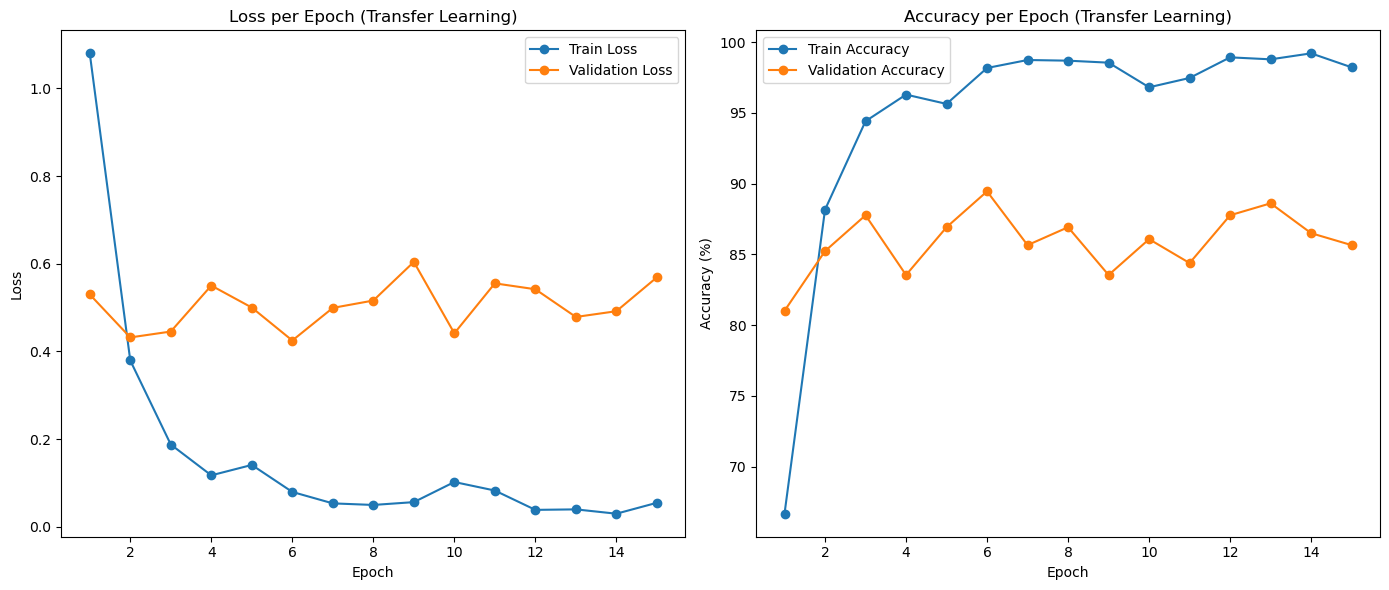

In [19]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
n_total_steps = len(train_loader)
for epoch in range(TL_NUM_EPOCHS):
    train_loss = 0
    train_correct = 0
    train_total = 0

    with tqdm(total=n_total_steps, desc=f'Training Epoch {epoch+1}/{TL_NUM_EPOCHS}') as pbar:
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            labels = labels.to(torch.int64)

            outputs = tl_model(images)
            loss = criterion(outputs, labels)

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            pbar.set_postfix({'Loss': loss.item(), 'Accuracy': f'{(train_correct / train_total) * 100:.2f}%'})
            pbar.update(1)


    avg_train_loss = train_loss / n_total_steps
    train_accuracy = (train_correct / train_total) * 100


    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)


    tl_model.eval()  
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  
        for images, labels in val_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            labels = labels.to(torch.int64)

            outputs = tl_model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()


    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = (val_correct / val_total) * 100

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{TL_NUM_EPOCHS}] Completed: '
          f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    tl_model.train()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, TL_NUM_EPOCHS + 1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, TL_NUM_EPOCHS + 1), val_losses, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch (Transfer Learning)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, TL_NUM_EPOCHS + 1), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, TL_NUM_EPOCHS + 1), val_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch (Transfer Learning)')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
#Fine Tuning
ft_model = models.resnet50(pretrained=True)
for param in ft_model.parameters():
    param.requires_grad = False
    
num_features = ft_model.fc.in_features

ft_model.fc = nn.Linear(num_features,NUM_CLASSES)

ft_model.to(DEVICE)

criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(ft_model.parameters(), lr=LR) 

/home/svyatoslav/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/svyatoslav/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training Epoch 1/25: 100%|█████████████████| 67/67 [00:12<00:00,  5.25it/s, Loss=2.14, Accuracy=21.52%]


Epoch [1/25] Completed: Train Loss: 2.2374, Train Accuracy: 21.52%, Val Loss: 2.0955, Val Accuracy: 40.08%


Training Epoch 2/25: 100%|█████████████████| 67/67 [00:11<00:00,  5.87it/s, Loss=1.86, Accuracy=46.15%]


Epoch [2/25] Completed: Train Loss: 2.0083, Train Accuracy: 46.15%, Val Loss: 1.9123, Val Accuracy: 53.59%


Training Epoch 3/25: 100%|█████████████████| 67/67 [00:12<00:00,  5.37it/s, Loss=1.64, Accuracy=58.65%]


Epoch [3/25] Completed: Train Loss: 1.8181, Train Accuracy: 58.65%, Val Loss: 1.7452, Val Accuracy: 61.18%


Training Epoch 4/25: 100%|█████████████████| 67/67 [00:11<00:00,  5.76it/s, Loss=1.49, Accuracy=62.88%]


Epoch [4/25] Completed: Train Loss: 1.6678, Train Accuracy: 62.88%, Val Loss: 1.5903, Val Accuracy: 70.04%


Training Epoch 5/25: 100%|█████████████████| 67/67 [00:11<00:00,  5.59it/s, Loss=1.36, Accuracy=66.26%]


Epoch [5/25] Completed: Train Loss: 1.5464, Train Accuracy: 66.26%, Val Loss: 1.4831, Val Accuracy: 67.51%


Training Epoch 6/25: 100%|█████████████████| 67/67 [00:12<00:00,  5.41it/s, Loss=1.22, Accuracy=67.48%]


Epoch [6/25] Completed: Train Loss: 1.4432, Train Accuracy: 67.48%, Val Loss: 1.4088, Val Accuracy: 69.20%


Training Epoch 7/25: 100%|█████████████████| 67/67 [00:11<00:00,  5.90it/s, Loss=1.17, Accuracy=68.89%]


Epoch [7/25] Completed: Train Loss: 1.3621, Train Accuracy: 68.89%, Val Loss: 1.3363, Val Accuracy: 68.78%


Training Epoch 8/25: 100%|█████████████████| 67/67 [00:23<00:00,  2.91it/s, Loss=1.07, Accuracy=70.77%]


Epoch [8/25] Completed: Train Loss: 1.2810, Train Accuracy: 70.77%, Val Loss: 1.2703, Val Accuracy: 69.20%


Training Epoch 9/25: 100%|████████████████████| 67/67 [00:28<00:00,  2.34it/s, Loss=1, Accuracy=72.37%]


Epoch [9/25] Completed: Train Loss: 1.2258, Train Accuracy: 72.37%, Val Loss: 1.2635, Val Accuracy: 70.46%


Training Epoch 10/25: 100%|████████████████| 67/67 [00:27<00:00,  2.41it/s, Loss=1.03, Accuracy=72.84%]


Epoch [10/25] Completed: Train Loss: 1.1654, Train Accuracy: 72.84%, Val Loss: 1.1486, Val Accuracy: 70.89%


Training Epoch 11/25: 100%|███████████████████| 67/67 [00:31<00:00,  2.10it/s, Loss=1, Accuracy=72.70%]


Epoch [11/25] Completed: Train Loss: 1.1318, Train Accuracy: 72.70%, Val Loss: 1.1562, Val Accuracy: 71.31%


Training Epoch 12/25: 100%|████████████████| 67/67 [00:31<00:00,  2.16it/s, Loss=1.03, Accuracy=73.21%]


Epoch [12/25] Completed: Train Loss: 1.0887, Train Accuracy: 73.21%, Val Loss: 1.0834, Val Accuracy: 72.57%


Training Epoch 13/25: 100%|███████████████| 67/67 [00:35<00:00,  1.87it/s, Loss=0.956, Accuracy=74.44%]


Epoch [13/25] Completed: Train Loss: 1.0551, Train Accuracy: 74.44%, Val Loss: 1.0839, Val Accuracy: 70.46%


Training Epoch 14/25: 100%|███████████████| 67/67 [00:27<00:00,  2.40it/s, Loss=0.912, Accuracy=74.30%]


Epoch [14/25] Completed: Train Loss: 1.0204, Train Accuracy: 74.30%, Val Loss: 1.0232, Val Accuracy: 73.00%


Training Epoch 15/25: 100%|███████████████| 67/67 [00:26<00:00,  2.50it/s, Loss=0.875, Accuracy=74.11%]


Epoch [15/25] Completed: Train Loss: 0.9957, Train Accuracy: 74.11%, Val Loss: 1.0090, Val Accuracy: 72.15%


Training Epoch 16/25: 100%|████████████████| 67/67 [00:27<00:00,  2.44it/s, Loss=0.82, Accuracy=75.38%]


Epoch [16/25] Completed: Train Loss: 0.9722, Train Accuracy: 75.38%, Val Loss: 0.9882, Val Accuracy: 72.57%


Training Epoch 17/25: 100%|███████████████| 67/67 [00:29<00:00,  2.25it/s, Loss=0.851, Accuracy=76.32%]


Epoch [17/25] Completed: Train Loss: 0.9491, Train Accuracy: 76.32%, Val Loss: 0.9507, Val Accuracy: 72.57%


Training Epoch 18/25: 100%|███████████████| 67/67 [00:31<00:00,  2.13it/s, Loss=0.803, Accuracy=75.52%]


Epoch [18/25] Completed: Train Loss: 0.9352, Train Accuracy: 75.52%, Val Loss: 0.9661, Val Accuracy: 73.84%


Training Epoch 19/25: 100%|████████████████| 67/67 [00:31<00:00,  2.10it/s, Loss=0.75, Accuracy=76.79%]


Epoch [19/25] Completed: Train Loss: 0.9093, Train Accuracy: 76.79%, Val Loss: 0.9400, Val Accuracy: 73.42%


Training Epoch 20/25: 100%|███████████████| 67/67 [00:32<00:00,  2.08it/s, Loss=0.806, Accuracy=77.63%]


Epoch [20/25] Completed: Train Loss: 0.8800, Train Accuracy: 77.63%, Val Loss: 0.8978, Val Accuracy: 74.68%


Training Epoch 21/25: 100%|████████████████| 67/67 [00:31<00:00,  2.14it/s, Loss=0.77, Accuracy=75.94%]


Epoch [21/25] Completed: Train Loss: 0.8905, Train Accuracy: 75.94%, Val Loss: 0.8956, Val Accuracy: 74.68%


Training Epoch 22/25: 100%|███████████████| 67/67 [00:39<00:00,  1.71it/s, Loss=0.731, Accuracy=77.73%]


Epoch [22/25] Completed: Train Loss: 0.8669, Train Accuracy: 77.73%, Val Loss: 0.9033, Val Accuracy: 73.84%


Training Epoch 23/25: 100%|███████████████| 67/67 [00:32<00:00,  2.09it/s, Loss=0.702, Accuracy=77.02%]


Epoch [23/25] Completed: Train Loss: 0.8372, Train Accuracy: 77.02%, Val Loss: 0.8822, Val Accuracy: 76.79%


Training Epoch 24/25: 100%|███████████████| 67/67 [00:29<00:00,  2.25it/s, Loss=0.703, Accuracy=76.74%]


Epoch [24/25] Completed: Train Loss: 0.8390, Train Accuracy: 76.74%, Val Loss: 0.8992, Val Accuracy: 72.15%


Training Epoch 25/25: 100%|███████████████| 67/67 [00:28<00:00,  2.33it/s, Loss=0.642, Accuracy=77.11%]


Epoch [25/25] Completed: Train Loss: 0.8238, Train Accuracy: 77.11%, Val Loss: 0.8851, Val Accuracy: 70.46%


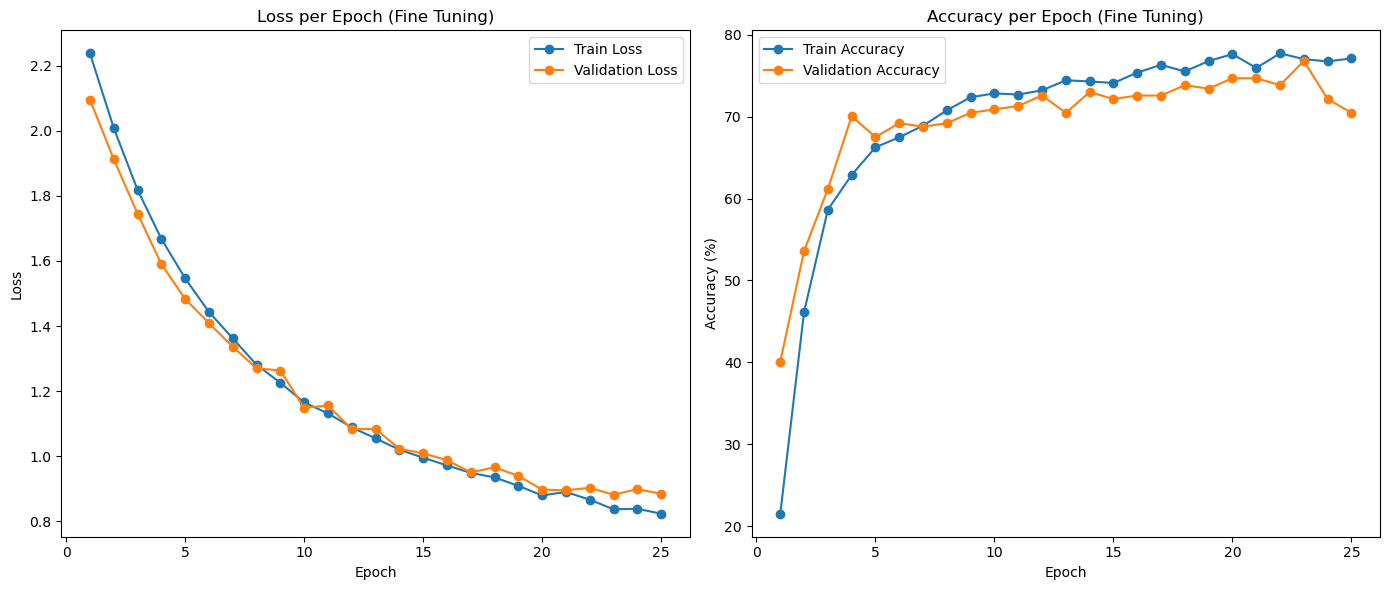

In [23]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
n_total_steps = len(train_loader)
for epoch in range(FT_NUM_EPOCHS):
    train_loss = 0
    train_correct = 0
    train_total = 0

    with tqdm(total=n_total_steps, desc=f'Training Epoch {epoch+1}/{FT_NUM_EPOCHS}') as pbar:
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            labels = labels.to(torch.int64)

            outputs = ft_model(images)
            loss = criterion(outputs, labels)

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            pbar.set_postfix({'Loss': loss.item(), 'Accuracy': f'{(train_correct / train_total) * 100:.2f}%'})
            pbar.update(1)


    avg_train_loss = train_loss / n_total_steps
    train_accuracy = (train_correct / train_total) * 100


    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)


    ft_model.eval()  
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  
        for images, labels in val_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            labels = labels.to(torch.int64)

            outputs = ft_model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()


    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = (val_correct / val_total) * 100

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{FT_NUM_EPOCHS}] Completed: '
          f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    ft_model.train()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, FT_NUM_EPOCHS + 1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, FT_NUM_EPOCHS + 1), val_losses, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch (Fine Tuning)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, FT_NUM_EPOCHS + 1), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, FT_NUM_EPOCHS + 1), val_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch (Fine Tuning)')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
def predict(model, loader):
  model.eval()
  preds = []
  with torch.no_grad():
    for images in loader:
      images = images.to(DEVICE)
      outputs = model(images).detach().cpu().numpy()
      preds.extend(list(np.argmax(outputs, axis=1)))
  return np.array(preds)

In [35]:
rez = predict(tl_model,test_loader)

In [37]:
def create_submission(predictions, filename):
    with open(filename + '.csv', 'w') as solution_file:
        solution_file.write('Id,Predicted\n')
        for i, string in enumerate(predictions):
            solution_file.write(str(i)+","+str(string)+'\n')

create_submission(rez, "sample_submission")